# Introdução
Nesse notebook realizo edições e faço uma análise inicial de um banco de dados que é a junção de dois bancos de dados, um de morte materna ao redor do mundo e outro relacionado à receita da indústria farmacêutica em diversos países (tema que tem a ver com a minha pesquisa de pós-graduação sobre o Complexo Industrial da Saúde - CEIS). 

# Processamento

In [2]:
import pandas as pd

In [3]:
df_health_mortality = pd.read_csv("MaternalMortality_HealthIndicators.csv")
df_health_mortality

,Unnamed: 0,Country,Year,Indicator:Maternal mortality ratio (per 100 000 live births),Type_of_Medicine,Measure,Total_Sales_Value
0,0,Australia,2016,6,B-Blood and blood forming organs,Million of national currency units,667.0
1,1,Australia,2016,6,M-Musculo-skeletal system,Million US$ at exchange rate,316.7
2,2,Australia,2016,6,M-Musculo-skeletal system,Million of national currency units,426.0
3,3,Australia,2016,6,R03-Drugs for obstructive airway diseases,Million of national currency units,629.0
4,4,Australia,2016,6,B-Blood and blood forming organs,Million US$ at exchange rate,495.8
...,...,...,...,...,...,...,...
34188,34188,United Kingdom,2013,8,J-Antiinfectives for systemic use,Million of national currency units,1729.4
34189,34189,United Kingdom,2013,8,G-Genito urinary system and sex hormones,"Million US$, purchasing power parity",978.2
34190,34190,United Kingdom,2013,8,G-Genito urinary system and sex hormones,% of total sales,4.7
34191,34191,United Kingdom,2013,8,G-Genito urinary system and sex hormones,"/capita, US$ exchange rate",16.6


In [4]:
# Irei trabalhar apenas com o ano 2017 e as vendas totais utilizando o mesmo parâmetro
# Dropei a Croácia porque era um outlier
df_filtrado = df_health_mortality[(df_health_mortality['Year'] == 2017) &\
                        (df_health_mortality['Type_of_Medicine'] == 'Total pharmaceutical sales')&\
                        (df_health_mortality['Measure'] == "/capita, US$ purchasing power parity")&\
                        (df_health_mortality['Country'] != "Croatia")]
df_filtrado.head()

,Unnamed: 0,Country,Year,Indicator:Maternal mortality ratio (per 100 000 live births),Type_of_Medicine,Measure,Total_Sales_Value
1396,1396,Australia,2017,6,Total pharmaceutical sales,"/capita, US$ purchasing power parity",406.6
2835,2835,Austria,2017,5,Total pharmaceutical sales,"/capita, US$ purchasing power parity",458.7
4182,4182,Belgium,2017,5,Total pharmaceutical sales,"/capita, US$ purchasing power parity",741.6
4465,4465,Canada,2017,10,Total pharmaceutical sales,"/capita, US$ purchasing power parity",672.1
6485,6485,Chile,2017,13,Total pharmaceutical sales,"/capita, US$ purchasing power parity",282.3


In [5]:
# Salvando os dez países com maior número de mortes maternas
df_materna_superior = df_filtrado.sort_values('Indicator:Maternal mortality ratio (per 100 000 live births)', ascending=False)
df_materna_superior = df_materna_superior[0:10]
df_materna_superior 

,Unnamed: 0,Country,Year,Indicator:Maternal mortality ratio (per 100 000 live births),Type_of_Medicine,Measure,Total_Sales_Value
22248,22248,Latvia,2017,19,Total pharmaceutical sales,"/capita, US$ purchasing power parity",417.4
6485,6485,Chile,2017,13,Total pharmaceutical sales,"/capita, US$ purchasing power parity",282.3
15132,15132,Hungary,2017,12,Total pharmaceutical sales,"/capita, US$ purchasing power parity",370.3
4465,4465,Canada,2017,10,Total pharmaceutical sales,"/capita, US$ purchasing power parity",672.1
10996,10996,Estonia,2017,9,Total pharmaceutical sales,"/capita, US$ purchasing power parity",427.1
25198,25198,New Zealand,2017,9,Total pharmaceutical sales,"/capita, US$ purchasing power parity",183.2
28340,28340,Portugal,2017,8,Total pharmaceutical sales,"/capita, US$ purchasing power parity",430.9
33943,33943,United Kingdom,2017,7,Total pharmaceutical sales,"/capita, US$ purchasing power parity",431.9
30568,30568,Slovenia,2017,7,Total pharmaceutical sales,"/capita, US$ purchasing power parity",411.0
12499,12499,Germany,2017,7,Total pharmaceutical sales,"/capita, US$ purchasing power parity",604.1


In [6]:
# Salvando os dez países com menor número de mortes maternas
df_materna_inferior = df_filtrado.sort_values('Indicator:Maternal mortality ratio (per 100 000 live births)')
df_materna_inferior = df_materna_inferior[0:10]
df_materna_inferior

,Unnamed: 0,Country,Year,Indicator:Maternal mortality ratio (per 100 000 live births),Type_of_Medicine,Measure,Total_Sales_Value
20151,20151,Italy,2017,2,Total pharmaceutical sales,"/capita, US$ purchasing power parity",541.6
26929,26929,Norway,2017,2,Total pharmaceutical sales,"/capita, US$ purchasing power parity",518.0
12345,12345,Finland,2017,3,Total pharmaceutical sales,"/capita, US$ purchasing power parity",486.4
31971,31971,Sweden,2017,4,Total pharmaceutical sales,"/capita, US$ purchasing power parity",490.9
31653,31653,Spain,2017,4,Total pharmaceutical sales,"/capita, US$ purchasing power parity",410.5
9323,9323,Denmark,2017,4,Total pharmaceutical sales,"/capita, US$ purchasing power parity",579.1
16691,16691,Iceland,2017,4,Total pharmaceutical sales,"/capita, US$ purchasing power parity",558.5
2835,2835,Austria,2017,5,Total pharmaceutical sales,"/capita, US$ purchasing power parity",458.7
4182,4182,Belgium,2017,5,Total pharmaceutical sales,"/capita, US$ purchasing power parity",741.6
24886,24886,Netherlands,2017,5,Total pharmaceutical sales,"/capita, US$ purchasing power parity",340.4


In [7]:
# Salvando os dez países com maior número de vendas farmacêuticas
df_farmaceuticas_superior = df_filtrado.sort_values('Total_Sales_Value', ascending=False)
df_farmaceuticas_superior = df_farmaceuticas_superior[0:10]
df_farmaceuticas_superior 

,Unnamed: 0,Country,Year,Indicator:Maternal mortality ratio (per 100 000 live births),Type_of_Medicine,Measure,Total_Sales_Value
4182,4182,Belgium,2017,5,Total pharmaceutical sales,"/capita, US$ purchasing power parity",741.6
4465,4465,Canada,2017,10,Total pharmaceutical sales,"/capita, US$ purchasing power parity",672.1
33350,33350,Switzerland,2017,5,Total pharmaceutical sales,"/capita, US$ purchasing power parity",649.5
12499,12499,Germany,2017,7,Total pharmaceutical sales,"/capita, US$ purchasing power parity",604.1
9323,9323,Denmark,2017,4,Total pharmaceutical sales,"/capita, US$ purchasing power parity",579.1
16691,16691,Iceland,2017,4,Total pharmaceutical sales,"/capita, US$ purchasing power parity",558.5
17931,17931,Ireland,2017,5,Total pharmaceutical sales,"/capita, US$ purchasing power parity",556.3
20151,20151,Italy,2017,2,Total pharmaceutical sales,"/capita, US$ purchasing power parity",541.6
26929,26929,Norway,2017,2,Total pharmaceutical sales,"/capita, US$ purchasing power parity",518.0
20936,20936,Japan,2017,5,Total pharmaceutical sales,"/capita, US$ purchasing power parity",504.7


In [8]:
# Salvando os dez países com menor número de vendas farmacêuticas
df_farmaceuticas_inferior = df_filtrado.sort_values('Total_Sales_Value')
df_farmaceuticas_inferior = df_farmaceuticas_inferior[0:10]
df_farmaceuticas_inferior 

,Unnamed: 0,Country,Year,Indicator:Maternal mortality ratio (per 100 000 live births),Type_of_Medicine,Measure,Total_Sales_Value
25198,25198,New Zealand,2017,9,Total pharmaceutical sales,"/capita, US$ purchasing power parity",183.2
6485,6485,Chile,2017,13,Total pharmaceutical sales,"/capita, US$ purchasing power parity",282.3
24886,24886,Netherlands,2017,5,Total pharmaceutical sales,"/capita, US$ purchasing power parity",340.4
15132,15132,Hungary,2017,12,Total pharmaceutical sales,"/capita, US$ purchasing power parity",370.3
1396,1396,Australia,2017,6,Total pharmaceutical sales,"/capita, US$ purchasing power parity",406.6
31653,31653,Spain,2017,4,Total pharmaceutical sales,"/capita, US$ purchasing power parity",410.5
30568,30568,Slovenia,2017,7,Total pharmaceutical sales,"/capita, US$ purchasing power parity",411.0
22248,22248,Latvia,2017,19,Total pharmaceutical sales,"/capita, US$ purchasing power parity",417.4
23595,23595,Luxembourg,2017,5,Total pharmaceutical sales,"/capita, US$ purchasing power parity",426.8
10996,10996,Estonia,2017,9,Total pharmaceutical sales,"/capita, US$ purchasing power parity",427.1


# Gráficos

In [9]:
import matplotlib.pyplot as plt

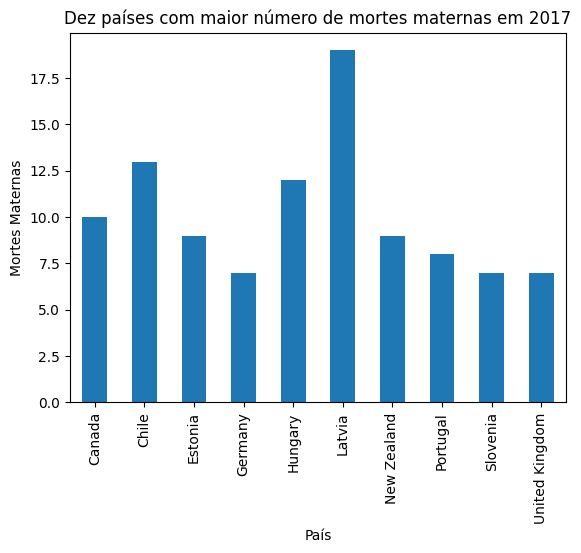

In [10]:
# Gráfico com os dez países com maior número de mortes maternas
agt_morte_materna = df_materna_superior.groupby('Country')['Indicator:Maternal mortality ratio (per 100 000 live births)'].mean()
agt_morte_materna.plot.bar()

plt.xlabel('País')
plt.ylabel('Mortes Maternas')
plt.title('Dez países com maior número de mortes maternas em 2017');

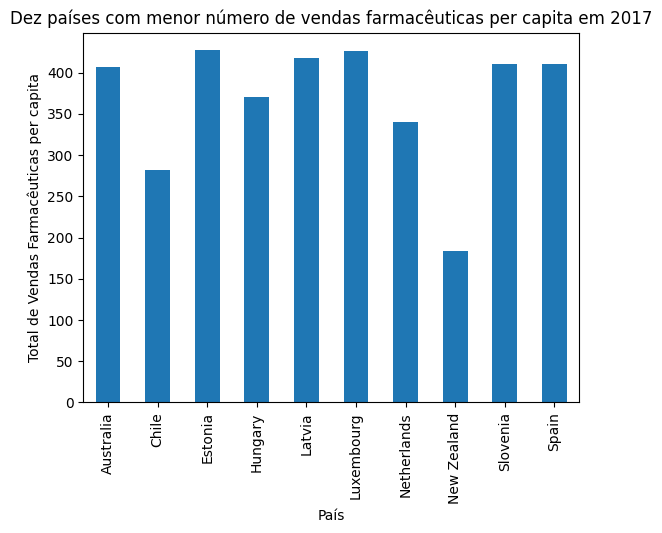

In [11]:
# Gráfico com os dez países com menor número de vendas farmacêuticas
agt_vendas_farmaceuticas = df_farmaceuticas_inferior.groupby('Country')['Total_Sales_Value'].mean()
agt_vendas_farmaceuticas.plot.bar()

plt.xlabel('País')
plt.ylabel('Total de Vendas Farmacêuticas per capita')
plt.title('Dez países com menor número de vendas farmacêuticas per capita em 2017');

É possível observar que alguns países estão entre os que tem maior número de mortes maternas e menor gasto em remédios (6): Chile, Estonia, Hungria, Latvia, Nova Zelândia e Eslovênia. 

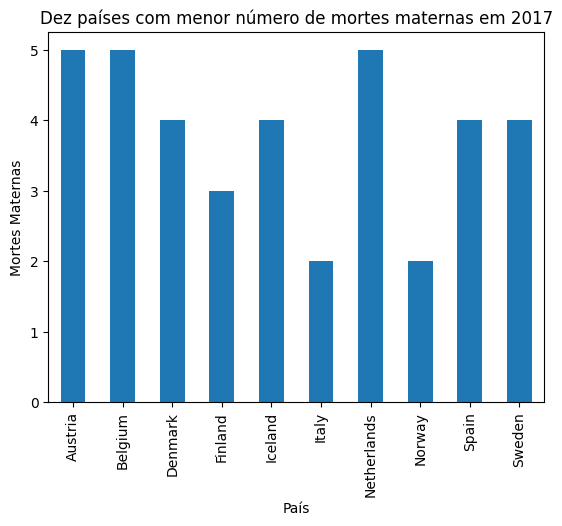

In [12]:
# Gráfico com os dez países com menor número de mortes maternas
agt_morte_materna = df_materna_inferior.groupby('Country')['Indicator:Maternal mortality ratio (per 100 000 live births)'].mean()
agt_morte_materna.plot.bar()

plt.xlabel('País')
plt.ylabel('Mortes Maternas')
plt.title('Dez países com menor número de mortes maternas em 2017');

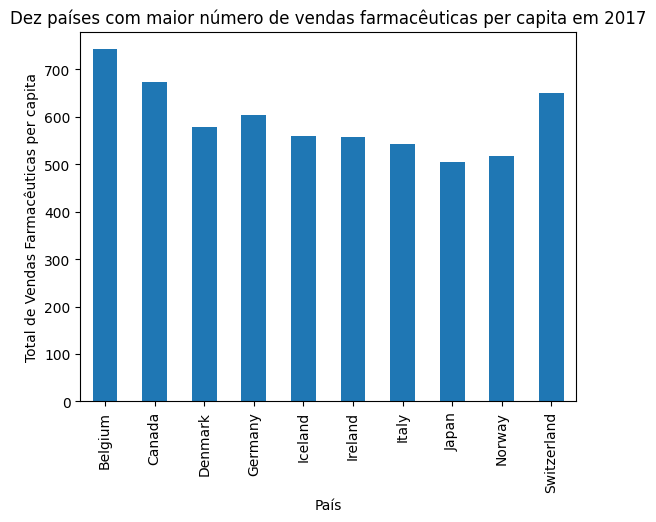

In [13]:
# Gráfico com os dez países com maior número de vendas farmacêuticas
agt_vendas_farmaceuticas = df_farmaceuticas_superior.groupby('Country')['Total_Sales_Value'].mean()
agt_vendas_farmaceuticas.plot.bar()

plt.xlabel('País')
plt.ylabel('Total de Vendas Farmacêuticas per capita')
plt.title('Dez países com maior número de vendas farmacêuticas per capita em 2017');

É possível observar que alguns países estão entre os que tem menor número de mortes maternas e maior gasto per capita em remédios (5): Bélgica, Dinamarca, Islândia, Itália, Noruega. 

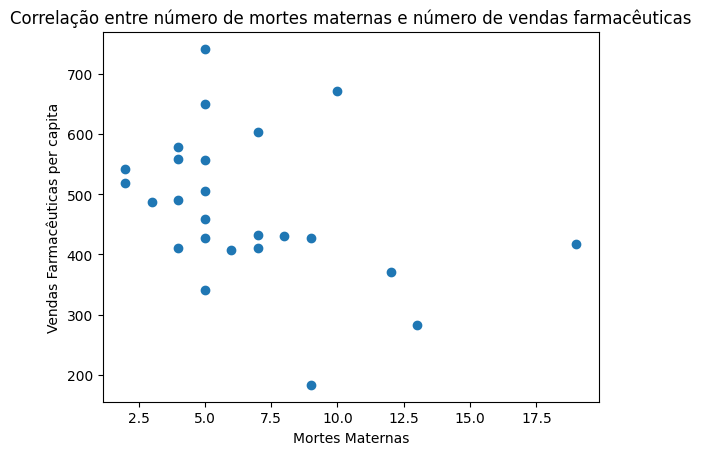

In [14]:
# Gráfico de correlação entre número de mortes maternas e número de vendas farmacêuticas
plt.scatter(df_filtrado["Indicator:Maternal mortality ratio (per 100 000 live births)"], df_filtrado["Total_Sales_Value"])
plt.title("Correlação entre número de mortes maternas e número de vendas farmacêuticas")
plt.xlabel("Mortes Maternas")
plt.ylabel("Vendas Farmacêuticas per capita")
plt.show()

In [15]:
import numpy as np

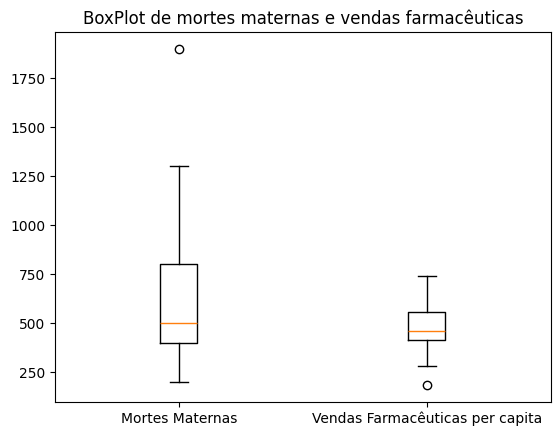

In [16]:
# Gráfico BoxPlot entre número de mortes maternas e número de vendas farmacêuticas
mortes_maternas = df_filtrado["Indicator:Maternal mortality ratio (per 100 000 live births)"]*100
# multipliquei as mortes por 100 para ficarem visíveis
vendas_farmaceuticas = df_filtrado["Total_Sales_Value"]
dados = [mortes_maternas, vendas_farmaceuticas]

fig, ax = plt.subplots()
ax.boxplot(dados) 
plt.title("BoxPlot de mortes maternas e vendas farmacêuticas")
plt.xticks([1, 2], ['Mortes Maternas', 'Vendas Farmacêuticas per capita'])

plt.show()

- Há uma grande concentração de mortes maternas no quartil superior. 
- Também há maior concentração de vendas farmacêuticas no quartil superior, mas os dados são distribuídos de maneira mais equilibrada. 

# Conclusões
- Análise de dados é muito difícil, socorro.
- Ao filtrar os dados, fiquei com poucas observações.
- Das observações, consegui notar que a correlação entre número de mortes maternas e vendas farmacêuticas per capita é muito baixa, mas negativa. 
- Portanto, não é possível afirmar que em países que gastam mais por pessoa em remédios há menos mortes maternas, mas há alguma indicação de que sim. 